In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell  # 显示所有输出
InteractiveShell.ast_node_interactivity = "all" 

data = pd.read_csv("films.csv")
X = data[["Rank","Box Office"]]

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'Box Office (In ten thousand)')

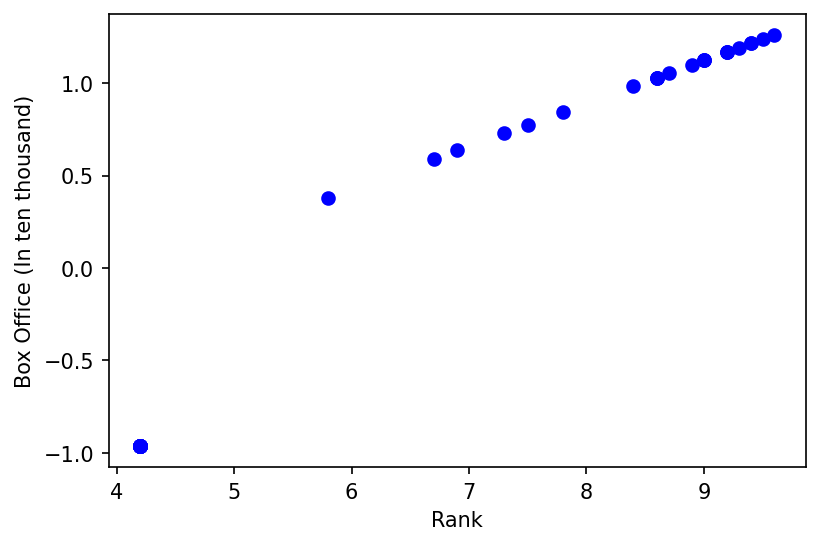

In [2]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Rank"],X["Box Office"],c='blue')
plt.xlabel('Rank')
plt.ylabel('Box Office (In ten thousand)')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\R-B cluster1.png',bbox_inches = 'tight')
plt.show()

In [3]:
from sklearn import preprocessing

In [4]:
X_scale = X.values[:,1]

In [5]:
X_scale

array([ 0.63559283,  1.03018388,  1.16945131,  0.72843779,  1.16945131,
        1.03018388,  0.84449398,  1.19266254,  1.23908502,  1.03018388,
       -0.96598258,  1.12302883, -0.96598258, -0.96598258,  0.38026922,
        1.21587378, -0.96598258,  1.21587378,  1.09981759,  0.77486026,
       -0.96598258, -0.96598258,  1.16945131, -0.96598258,  1.12302883,
       -0.96598258, -0.96598258, -0.96598258, -0.96598258,  1.26229626,
        1.12302883, -0.96598258, -0.96598258, -0.96598258, -0.96598258,
       -0.96598258, -0.96598258, -0.96598258, -0.96598258,  1.05339512,
        0.58917036, -0.96598258,  0.9837614 , -0.96598258, -0.96598258,
       -0.96598258, -0.96598258])

In [6]:
scaler = preprocessing.StandardScaler().fit(X_scale.reshape(-1,1))

In [7]:
print(scaler.mean_)
print(scaler.scale_)

[4.25191797e-17]
[1.]


In [8]:
X_scaled = scaler.transform(X_scale.reshape(-1,1))

In [9]:
X_scale.reshape(-1,1).shape

(47, 1)

In [10]:
X_scaled.shape

(47, 1)

In [11]:
X_scaled_csv = pd.Series(X_scaled.reshape(1,-1)[0])
    # 将其重新格式化以导出到Kaggle
X['Box Office'] = pd.Series(X_scaled.reshape(1, -1)[0])

C:\Users\AoSun\AppData\Local\Temp/ipykernel_21712/1314321020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Box Office'] = pd.Series(X_scaled.reshape(1, -1)[0])


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'Box Office  (scaled)')

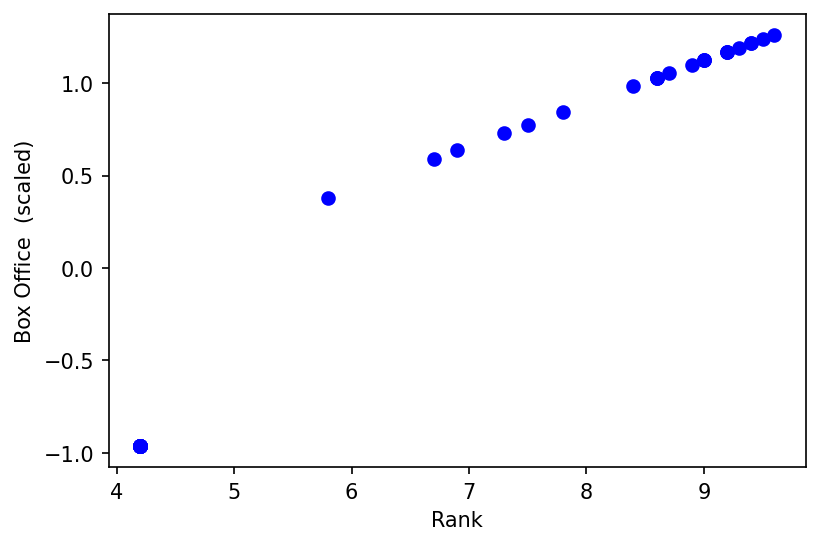

In [12]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Rank"],X["Box Office"],c='blue')
plt.xlabel('Rank')
plt.ylabel('Box Office  (scaled)')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\R-B cluster2.png')
plt.show()

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'Box Office (scaled)')

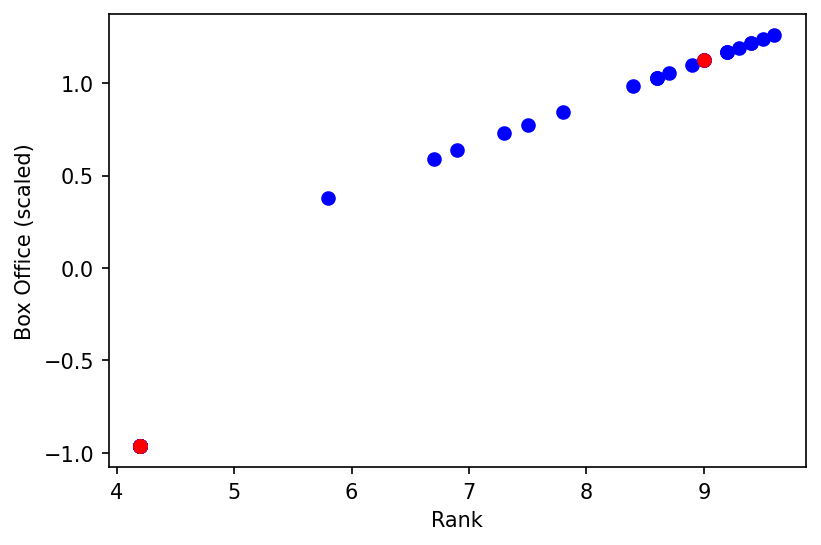

In [13]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K)) # 随机抽样三个点
plt.figure(dpi=150)

plt.scatter(X["Rank"],X["Box Office"],c='blue')
plt.scatter(Centroids["Rank"],Centroids["Box Office"],c='red')
plt.xlabel('Rank')
plt.ylabel('Box Office (scaled)')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\R-B cluster3.png')
plt.show()

In [14]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]  # 记录每个点离质心的距离
        for index2,row_d in XD.iterrows():
            d1=(row_c["Rank"]-row_d["Rank"])**2
            d2=(row_c["Box Office"]-row_d["Box Office"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
           
        X[i]=ED  # 各个点离质心距离
        i=i+1
    
    C=[]
    for index,row in X.iterrows(): # 判断点离哪个质心最近
        min_dist=row[1]
        pos=1
        for i in range(K):  # i从0开始
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C   
    Centroids_new = X.groupby(["Cluster"]).mean()[["Box Office","Rank"]]  # 求各簇的质心
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Box Office'] - Centroids['Box Office']).sum() + (Centroids_new['Rank'] - Centroids['Rank']).sum()
        print(diff.sum())  # 质心不再改变时停止
    Centroids = X.groupby(["Cluster"]).mean()[["Box Office","Rank"]]

0.7364671720700582
-0.7721237575872645
-0.7006875454181879
0.0


C:\Users\AoSun\AppData\Local\Temp/ipykernel_21712/1589745635.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED  # 各个点离质心距离


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Rank')

Text(0, 0.5, 'Box Office (scaled)')

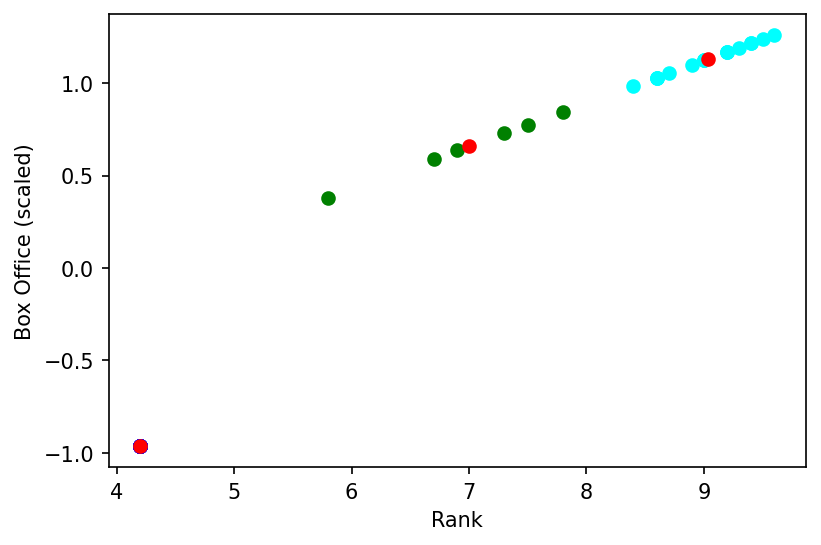

In [15]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
plt.figure(dpi=150)

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Rank"],data["Box Office"],c=color[k])
plt.scatter(Centroids["Rank"],Centroids["Box Office"],c='red')
plt.xlabel('Rank')
plt.ylabel('Box Office (scaled)')

plt.savefig('C:\\Users\AoSun\Desktop\cluster\R-B cluster4.png')
plt.show()

In [16]:
mark = ['*r','*b','*g','*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)

plt.show()

NameError: name 'centers' is not defined